<a href="https://colab.research.google.com/github/Tanishq7642/Multiple_Image_Classification_Model/blob/main/multiclass_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [3]:
print(torch.__version__)


2.6.0+cu124


In [4]:
#Getting a dataset
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.18MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.5MB/s]


In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

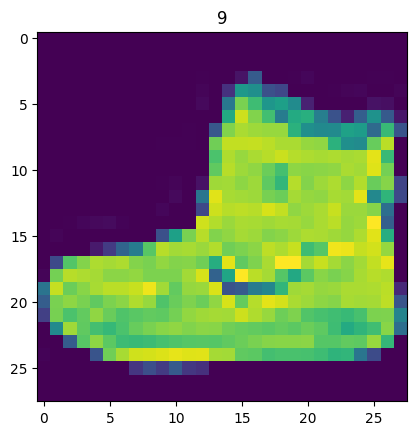

In [8]:
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

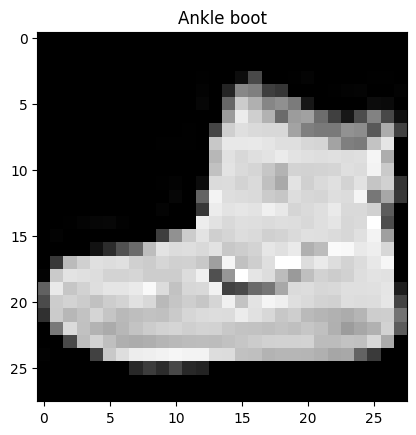

In [9]:
plt.imshow(image.squeeze(),cmap="grey")
plt.title(class_names[label])

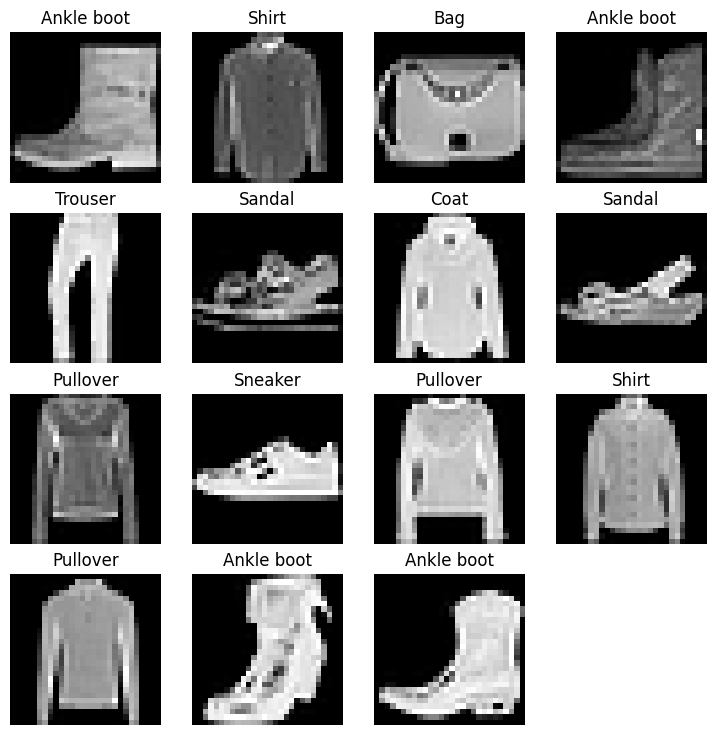

In [10]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols*+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="grey")
  plt.title(class_names[label])
  plt.axis(False);

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)


In [12]:
train_features_batch,train_label_batch=next(iter(train_dataloader))#iter makes the data iterable and next is used for next batch
train_features_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

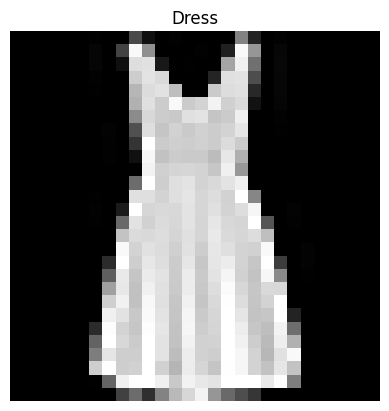

In [13]:
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [14]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f"Shape before flattening:{x.shape}")
print(f"shape after flattening:{output.shape}")

Shape before flattening:torch.Size([1, 28, 28])
shape after flattening:torch.Size([1, 784])


In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(input_shape=28*28,
                            hidden_units=10,
                            output_shape=len(class_names)
                            )
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


In [20]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f"Train time on{device}:{total_time:.3f} seconds")
  return total_time

In [21]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time oncpu:0.000 seconds


2.593199999978424e-05

In [22]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device="cpu")



  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.51016, Test acc: 82.04%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47435 | Test loss: 0.52677, Test acc: 81.68%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45367 | Test loss: 0.51264, Test acc: 83.00%

Train time oncpu:25.008 seconds


In [23]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss /=len(data_loader)
    acc /=len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5119838714599609,
 'model_acc': 83.02715654952077}

In [24]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"

In [25]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int,
               ):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)


In [26]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names))
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
         [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
         [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
         ...,
         [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
         [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
         [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
          0.0018,  0.0163], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
           0.2019,  0.2847],
         [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
           0.0932, -0.1864],
         [ 0.2488,  0.1500,  0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565,
          -0.2877, -0.1792]

In [27]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [28]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    y_preds=model(X)
    loss=loss_fn(y_preds,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_preds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(dataloader)
  train_acc/=len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



In [29]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device
              ):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      test_preds=model(X)
      test_loss+=loss_fn(test_preds,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_preds.argmax(dim=1))
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [30]:
torch.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.92727 | Test accuracy: 66.00%

Train loss: 0.73779 | Train accuracy: 73.69%
Test loss: 0.68793 | Test accuracy: 75.43%

Train loss: 0.66776 | Train accuracy: 76.08%
Test loss: 0.64329 | Test accuracy: 76.87%

Train time oncuda:41.998 seconds


In [31]:
model_1_results=eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6879838705062866,
 'model_acc': 75.62899361022365}

In [32]:
#create a convolutional neutral network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"conv_layer_1: {x.shape}")
    x=self.conv_block_2(x)
    # print(f"conv_layer_2: {x.shape}")
    x=self.classifier(x)
    # print(x.shape)
    return x




In [33]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names))#here the input is number of color channels in our input
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape:{images.shape}")
print(f"Single Image shape:{test_image.shape}")

Image batch shape:torch.Size([32, 3, 64, 64])
Single Image shape:torch.Size([3, 64, 64])


In [35]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [36]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_image)
print(f"shape after conv layer: {test_image_through_conv.shape}")
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"shape after conv and max layer: {test_image_through_conv_and_max_pool.shape}")


shape after conv layer: torch.Size([10, 62, 62])
shape after conv and max layer: torch.Size([10, 31, 31])


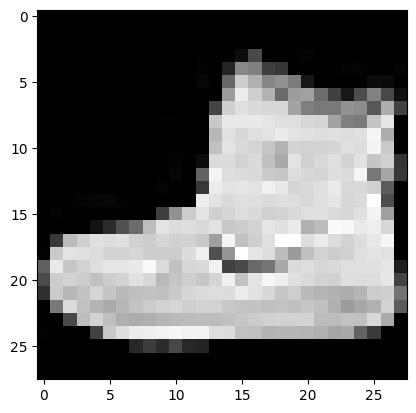

In [37]:
plt.imshow(image.squeeze(),cmap="gray")

In [38]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5, 5),
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [39]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0332, -0.0902,  0.0763, -0.0369,  0.0092,  0.0363,  0.0102,  0.0098,
         -0.0007, -0.0032]], grad_fn=<AddmmBackward0>)

In [40]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)


In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model_2,
             dataloader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.59046 | Train accuracy: 78.60%
Test loss: 0.39534 | Test accuracy: 85.87%

Train loss: 0.36248 | Train accuracy: 86.89%
Test loss: 0.38142 | Test accuracy: 86.57%

Train loss: 0.32558 | Train accuracy: 88.25%
Test loss: 0.34804 | Test accuracy: 87.44%

Train time oncuda:106.583 seconds


In [42]:
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34745776653289795,
 'model_acc': 87.47004792332268}

In [43]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.511984,83.027157
1,FashionMNISTModelV1,0.687984,75.628994
2,FashionMNISTModelV2,0.347458,87.470048


In [44]:
compare_results["trainig_time"]=[total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,trainig_time
0,FashionMNISTModelV0,0.511984,83.027157,25.008244
1,FashionMNISTModelV1,0.687984,75.628994,41.997915
2,FashionMNISTModelV2,0.347458,87.470048,106.582807


In [45]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #adding batch dimention
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logits=model(sample)
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [46]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

Text(0.5, 1.0, 'Sandal')

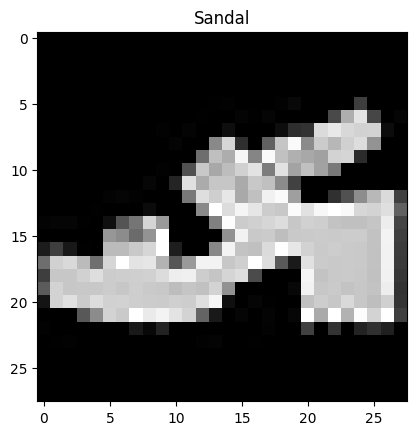

In [47]:
plt.imshow(test_samples[0].squeeze(),cmap="grey")
plt.title(class_names[test_labels[0]])

In [49]:
pred_prob=make_predictions(model=model_2.to(device),
                           data=test_samples)
pred_prob[:2]

tensor([[2.1618e-07, 4.6055e-08, 5.3926e-08, 9.5179e-08, 7.2494e-09, 9.9933e-01,
         8.0816e-08, 7.6049e-05, 3.2310e-05, 5.6013e-04],
        [9.3479e-02, 6.3942e-01, 1.5556e-03, 1.5604e-01, 1.9271e-02, 2.0274e-04,
         8.7143e-02, 2.4027e-04, 2.3589e-03, 2.8572e-04]])

In [50]:
pred_classes=pred_prob.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [51]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

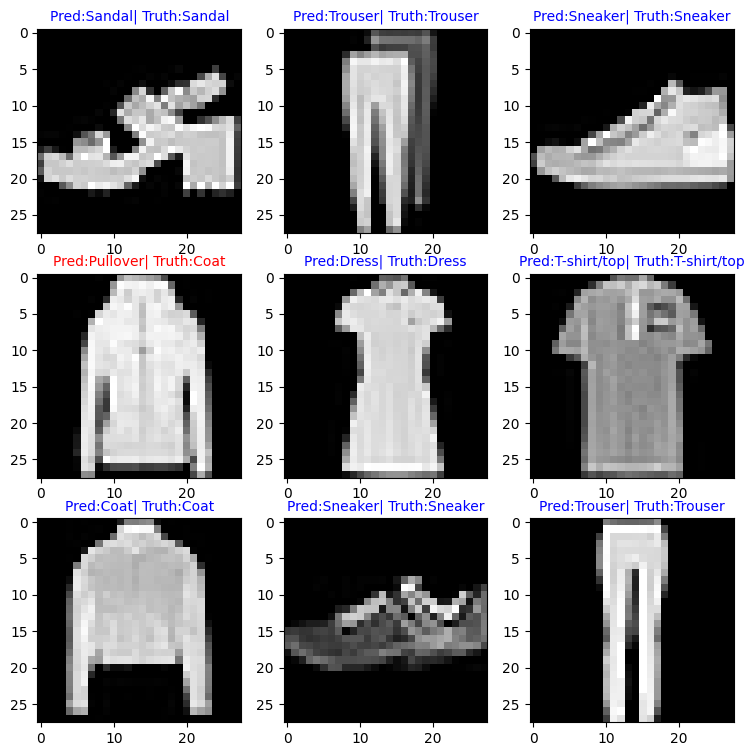

In [52]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
 plt.subplot(nrows,ncols,i+1)
 plt.imshow(sample.squeeze(),cmap="grey")
 pred_label=class_names[pred_classes[i]]
 truth_label=class_names[test_labels[i]]
 title_text=f"Pred:{pred_label}| Truth:{truth_label}"
 if pred_label==truth_label:
  plt.title(title_text,fontsize=10,c="b")
 else:
  plt.title(title_text,fontsize=10,c="r")



In [61]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions"):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor.to(device)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([2, 8, 1,  ..., 9, 9, 3], device='cuda:0')

In [62]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.4
